In [6]:
# Convert Logs to a dataframe

import os
import json
import pandas as pd
import seaborn as sns

suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']


def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])


path = "./logs/"
dir_list = os.listdir(path)

logs = []

for file in dir_list:
    with open("./logs/" + file, 'r') as f:
        for line in f.readlines():
            jsonData = json.loads(line)
            if jsonData["level"] == "info" and jsonData["message"] == "FINISH":
                logs.append(jsonData)

df = pd.DataFrame(logs)

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%S")
# df["BYTES"] = df["BYTES"].apply(humansize)


<AxesSubplot:xlabel='time'>

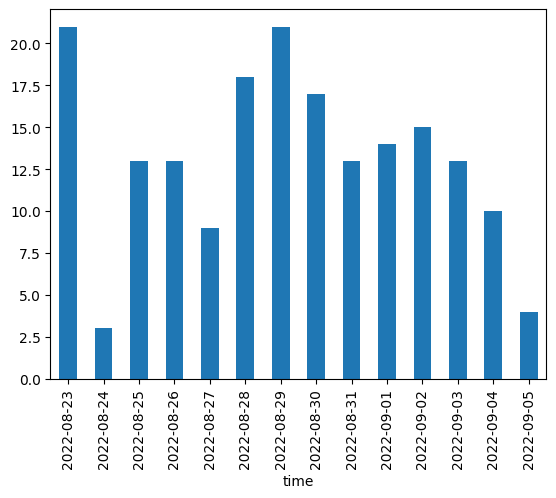

In [7]:
# Connections per day

df["time"].groupby(df["time"].dt.date).count().plot(kind="bar")

[Text(0, 0, '2022-08-23'),
 Text(1, 0, '2022-08-24'),
 Text(2, 0, '2022-08-25'),
 Text(3, 0, '2022-08-26'),
 Text(4, 0, '2022-08-27'),
 Text(5, 0, '2022-08-28'),
 Text(6, 0, '2022-08-29'),
 Text(7, 0, '2022-08-30'),
 Text(8, 0, '2022-08-31'),
 Text(9, 0, '2022-09-01'),
 Text(10, 0, '2022-09-02'),
 Text(11, 0, '2022-09-03'),
 Text(12, 0, '2022-09-04'),
 Text(13, 0, '2022-09-05')]

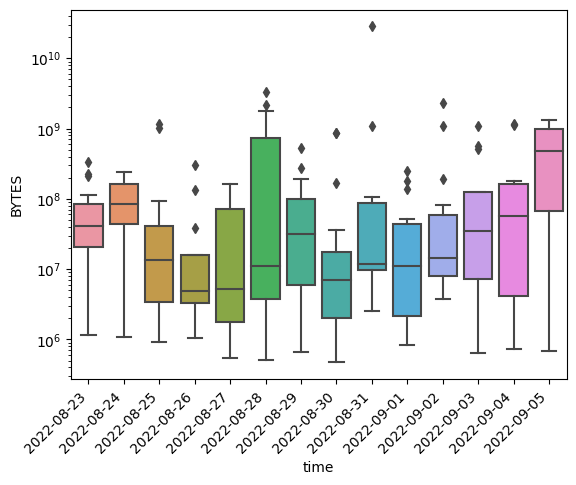

In [13]:
ax = sns.boxplot(x=df["time"].dt.date, y=df["BYTES"] )
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

In [9]:
humansize( df.BYTES.sum())

'56.59 GB'

In [10]:
df.DURATION.sum()/60000

207.75322158443336